In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

122

In [5]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                18
price_per_sqft       18
area                 18
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
additionalRoom        0
floorNum             19
facing             1104
agePossession         1
nearbyLocations     177
furnishDetails      981
features            635
dtype: int64

In [6]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,lotus homz,sector 111,0.60,8450.0,710.0,Carpet area: 710 (65.96 sq.m.),2,2,3,not available,9.0,East,0 to 1 Year Old,"['Sector 23 Huda Market', 'HUDA Market', 'Jai Vision Public School', 'New Cambridge School', 'Meenakshi Public School', 'Gurudwara-Sahib Kunj', 'Ratnakar Bank ATM', 'ICICI Bank ATM', 'Samriddhi Hospital', 'Metro Hospital', 'Tikona Park', 'Palam Vihar Park', 'Bijwasan Station', 'The Emporium', 'Bajghera Police Station']",[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']"
1,house,independent,sector 5,3.50,15555.0,2250.0,Plot area 2050(190.45 sq.m.)Built Up area: 2250 sq.ft. (209.03 sq.m.),6,5,2,"pooja room,study room,servant room,others",3.0,North-East,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Dr. Sindhu Clinic', 'Sarvodya Hospital', 'Yashroop Medical Centre', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sneh Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Dr. Mittal Clinic', 'Jiya Clinic', 'Gurgaon Eye Centre', 'Prateek Nursing Home And Polyclinic', 'GH Gurgaon', 'Kr Dental Hub', 'Dr. Agya Ram Sharma Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Dr. Ashok Jain', 'Bhatnagar Maternity and Nursing Home', 'Pearl Dental Clinic', 'Geeta Nursing Home Gurgaon', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Hitesh Dawar', 'Kidney Clinic', 'Bhardwaj Hospital', 'Jackson Hospital', 'Taneja Hospital', 'Shree Krishna Hospital Gurgaon', 'Lalit Dental Care', 'M Goel Hospital', 'Dr. Tomar Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'R K Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Lieutenant Atul Kataria School', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Water Purifier', '1 Fridge', '8 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '21 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', '5 Wardrobe', '2 Bed', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"
2,flat,shree vardhman flora,sector 90,0.92,4906.0,1875.0,Super Built up area 1875(174.19 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,4,3,servant room,4.0,North-East,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Commu

In [7]:
df[['area','areaWithType']].sample(5)

,area,areaWithType
2357,2298.0,Carpet area: 2298 (213.49 sq.m.)
553,1975.0,Carpet area: 1975 (183.48 sq.m.)
1402,1975.0,Built Up area: 1975 (183.48 sq.m.)
1926,2520.0,Carpet area: 2520 (234.12 sq.m.)
1271,1756.0,Built Up area: 1758 (163.32 sq.m.)


In [8]:
def get_super_built_up_area(text):
  match = re.search(r'Super Built up area (\d+\.?\d*)',text)
  if match:
    return float(match.group(1))
  return None

In [9]:
def get_area(text,area_type):
  match = re.search(area_type+ r'\s*:\s*(\d+\.?\d*)',text)
  if match:
    return float(match.group(1))
  return None

In [10]:
def convert_to_sqft(text,area_value):
  if area_value is None:
    return None
  match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
  if match:
    sq_m_value = float(match.group(1))
    return sq_m_value * 10.7639
  return area_value

In [11]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [12]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
738,19.50,house,8775.0,Plot area 975(815.22 sq.m.),NaN,NaN,NaN
330,0.55,flat,600.0,Super Built up area 850(78.97 sq.m.)Built Up area: 610 sq.ft. (56.67 sq.m.)Carpet area: 600 sq.ft. (55.74 sq.m.),850.0,610.0,600.0
690,5.00,flat,6500.0,Carpet area: 5200 (483.1 sq.m.),NaN,NaN,5200.0
1570,1.60,flat,1850.0,Super Built up area 1850(171.87 sq.m.),1850.0,NaN,NaN
1938,1.28,flat,1450.0,Carpet area: 1450 (134.71 sq.m.),NaN,NaN,1450.0


In [13]:
df[~((df['super_built_up_area'].isnull())| (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2756,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,NaN,NaN
1235,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,NaN,NaN
2323,6.40,house,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 349 sq.yards (291.81 sq.m.)Carpet area: 348 sq.yards (290.97 sq.m.),NaN,349.0,348.0
326,5.88,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN
2593,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1104
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1887
built_up_area          2615
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,1.00,house,126.0,Plot area 126(11.71 sq.m.),NaN,NaN,NaN
11,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
19,3.75,house,1701.0,Plot area 189(158.03 sq.m.),NaN,NaN,NaN
21,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
24,0.60,house,57.0,Plot area 57(5.3 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [21]:
all_nan_df.head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,1.00,house,126.0,Plot area 126(11.71 sq.m.),NaN,126.0,NaN
11,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
19,3.75,house,1701.0,Plot area 189(158.03 sq.m.),NaN,189.0,NaN
21,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,360.0,NaN
24,0.60,house,57.0,Plot area 57(5.3 sq.m.),NaN,57.0,NaN


In [22]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [23]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [24]:
all_nan_df.head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,1.00,house,126.0,Plot area 126(11.71 sq.m.),NaN,126.0,NaN
11,12.50,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN
19,3.75,house,1701.0,Plot area 189(158.03 sq.m.),NaN,1701.0,NaN
21,7.80,house,3370.0,Plot area 360(301.01 sq.m.),NaN,3240.0,NaN
24,0.60,house,57.0,Plot area 57(5.3 sq.m.),NaN,57.0,NaN


In [25]:
df.update(all_nan_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1104
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1887
built_up_area          2069
carpet_area            1859
dtype: int64

In [27]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            98
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [28]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [29]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1547,servant room,0,1,0,0,0
1586,not available,0,0,0,0,0
1974,"servant room,pooja room",0,1,0,1,0
2059,not available,0,0,0,0,0
227,not available,0,0,0,0,0


In [30]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  20
By 2023                 19
By 2024                 17
Dec-24                  15
Mar-24                  14
Oct-24                   7
Jan-24                   7
Dec-25                   7
Aug-23                   7
Nov-23                   5
Jun-24                   5
By 2025                  4
Sep-23                   4
Aug-24                   4
Jul-24                   4
Jan-25                   3
Nov-24                   3
May-24                   3
Feb-24                   3
Oct-23                   3
Oct-25                   2
Jul-27                   2
Dec 2023                 2
Apr-26                   2
By 2027                  2
Jul-25                   2
Mar-25                   2
Jun 2024                 2
Aug-25                   2
D

In [31]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [32]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [33]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              475
Old Property           310
Under Construction     140
Name: agePossession, dtype: int64

In [34]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,lotus homz,sector 111,0.60,8450.0,710.0,Carpet area: 710 (65.96 sq.m.),2,2,3,not available,9.0,East,New Property,"['Sector 23 Huda Market', 'HUDA Market', 'Jai Vision Public School', 'New Cambridge School', 'Meenakshi Public School', 'Gurudwara-Sahib Kunj', 'Ratnakar Bank ATM', 'ICICI Bank ATM', 'Samriddhi Hospital', 'Metro Hospital', 'Tikona Park', 'Palam Vihar Park', 'Bijwasan Station', 'The Emporium', 'Bajghera Police Station']",[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,710.0,0,0,0,0,0
1,house,independent,sector 5,3.50,15555.0,2250.0,Plot area 2050(190.45 sq.m.)Built Up area: 2250 sq.ft. (209.03 sq.m.),6,5,2,"pooja room,study room,servant room,others",3.0,North-East,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Dr. Sindhu Clinic', 'Sarvodya Hospital', 'Yashroop Medical Centre', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sneh Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Dr. Mittal Clinic', 'Jiya Clinic', 'Gurgaon Eye Centre', 'Prateek Nursing Home And Polyclinic', 'GH Gurgaon', 'Kr Dental Hub', 'Dr. Agya Ram Sharma Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Dr. Ashok Jain', 'Bhatnagar Maternity and Nursing Home', 'Pearl Dental Clinic', 'Geeta Nursing Home Gurgaon', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Hitesh Dawar', 'Kidney Clinic', 'Bhardwaj Hospital', 'Jackson Hospital', 'Taneja Hospital', 'Shree Krishna Hospital Gurgaon', 'Lalit Dental Care', 'M Goel Hospital', 'Dr. Tomar Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'R K Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Lieutenant Atul Kataria School', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Water Purifier', '1 Fridge', '8 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '21 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', '5 Wardrobe', '2 Bed', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,2250.0,NaN,1,1,0,1,1
2,flat,shree vardhman flora,sector 90,0.92,4906.0,1875.0,Super Built up area 1875(174.19 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,4,3,servant room,4.0,North-East,Relatively New,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']",NaN,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural 

In [35]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
55,"['9 Fan', '6 Geyser', '9 Light', '6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'Centrally Air Conditioned', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors']"
51,"['5 Fan', '1 Exhaust Fan', '5 Light', '1 Chimney', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2830,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Geyser', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3061,"['5 Wardrobe', '4 Fan', '1 Exhaust Fan', '6 Geyser', '6 Light', '7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2300,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Geyser', '1 Stove', '10 Light', '3 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for serva

In [36]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [37]:
furnishings_df.shape

(3802, 19)

In [38]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-38-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [39]:
furnishings_df.sample(5)

,Dining Table,Curtains,Light,Water Purifier,Modular Kitchen,Wardrobe,Geyser,Washing Machine,Microwave,TV,Sofa,Exhaust Fan,Chimney,AC,Fan,Bed,Fridge,Stove
2635,0,0,20,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0
2895,0,0,9,0,0,3,0,0,0,0,0,1,0,0,4,0,0,0
1498,0,0,4,0,1,5,5,0,0,0,0,1,2,0,11,0,0,0
1292,0,0,0,0,1,4,5,0,0,0,0,1,1,0,10,0,0,1
3286,0,1,10,0,0,4,3,0,1,0,0,1,1,4,6,0,0,0


In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [42]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

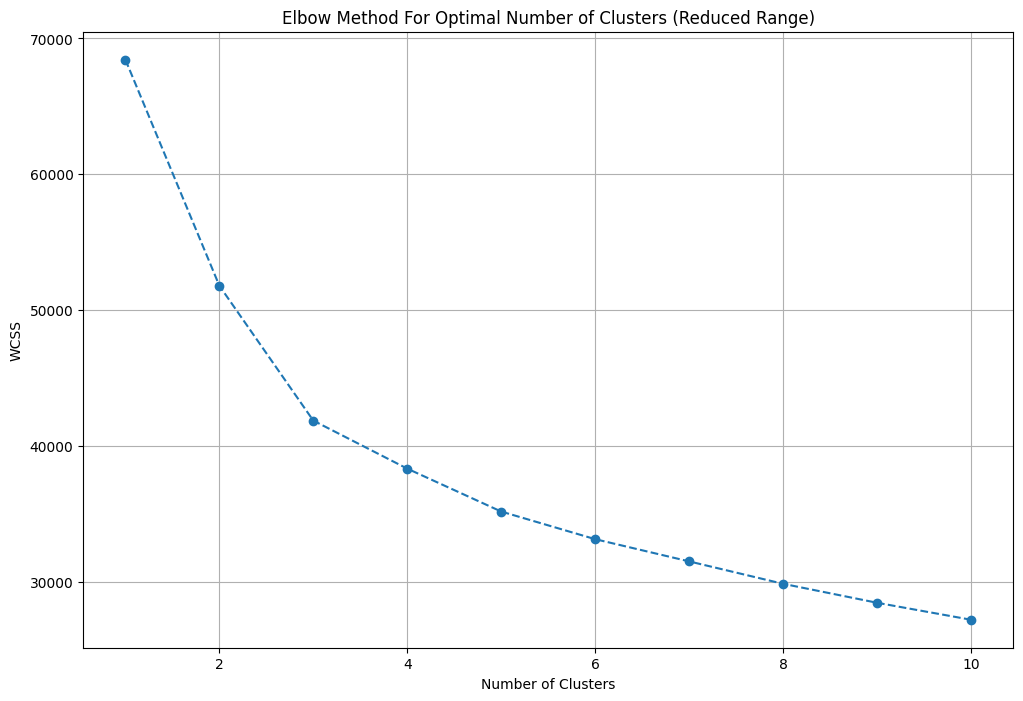

In [43]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [44]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
df = df.iloc[:,:-18]

In [46]:
df['furnishing_type'] = cluster_assignments

In [47]:
df.sample(5)[['furnishDetails','furnishing_type']]

,furnishDetails,furnishing_type
901,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1441,"['6 Fan', '5 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1255,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
1256,"['1 Wardrobe', '3 Fan', '5 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2829,"['2 Wardrobe', '2 Fan', '4 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1


In [48]:
df[['society','features']].sample(5)

,society,features
3412,independent,NaN
3258,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal']"
3218,ats kocoon,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2257,international city by sobha phase 2,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2527,ansal api spanish court,"['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Park', 'Visitor Parking', 'Security Personnel', 'Waste Disposal', 'Club house / Community Center', 'Rain Water Harvesting']"


In [49]:
df['features'].isnull().sum()

635

In [50]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [51]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [52]:
temp_df = df[df['features'].isnull()]

In [53]:
temp_df.shape

(635, 26)

In [54]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [55]:
df.loc[temp_df.index,'features'] = x.values

In [56]:
df['features'].isnull().sum()

481

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [58]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [59]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1431,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2499,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [60]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

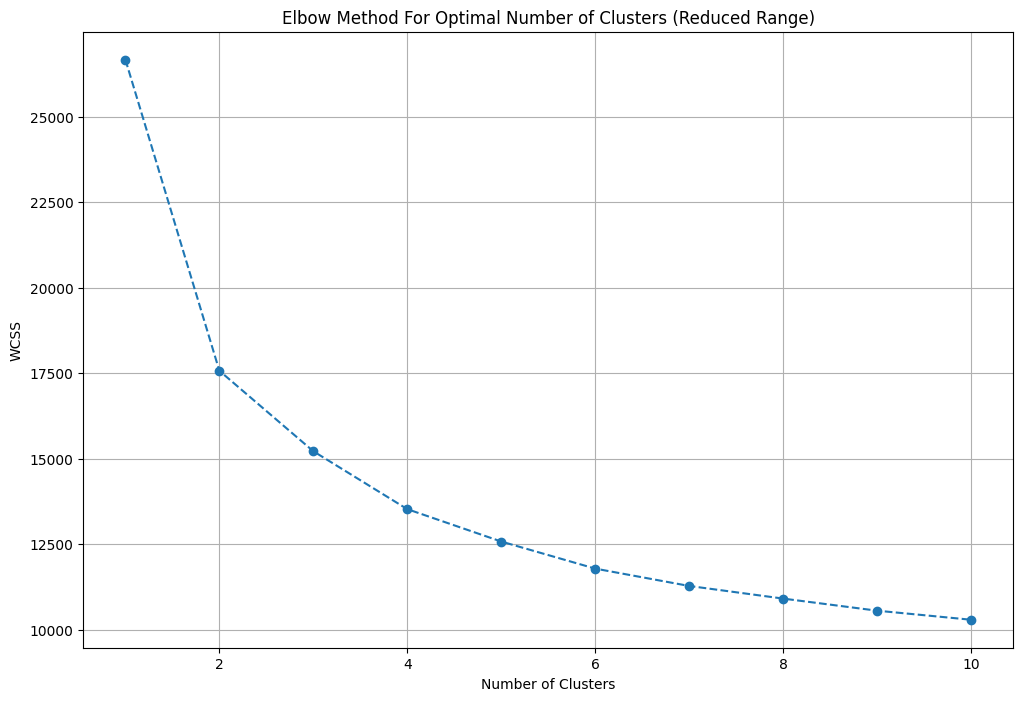

In [61]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [62]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [63]:
df['luxury_score'] = luxury_score

In [64]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,lotus homz,sector 111,0.60,8450.0,710.0,Carpet area: 710 (65.96 sq.m.),2,2,3,not available,9.0,East,New Property,"['Sector 23 Huda Market', 'HUDA Market', 'Jai Vision Public School', 'New Cambridge School', 'Meenakshi Public School', 'Gurudwara-Sahib Kunj', 'Ratnakar Bank ATM', 'ICICI Bank ATM', 'Samriddhi Hospital', 'Metro Hospital', 'Tikona Park', 'Palam Vihar Park', 'Bijwasan Station', 'The Emporium', 'Bajghera Police Station']",[],"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,710.0,0,0,0,0,0,1,"[Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking, Fitness Centre / GYM, Club house / Community Center]",52
1,house,independent,sector 5,3.50,15555.0,2250.0,Plot area 2050(190.45 sq.m.)Built Up area: 2250 sq.ft. (209.03 sq.m.),6,5,2,"pooja room,study room,servant room,others",3.0,North-East,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'State bank ATM', 'Dr. Sindhu Clinic', 'Sarvodya Hospital', 'Yashroop Medical Centre', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Sneh Hospital Gurgaon', ""Dr. Anurag's Child Care Clinic"", 'Dr. Mittal Clinic', 'Jiya Clinic', 'Gurgaon Eye Centre', 'Prateek Nursing Home And Polyclinic', 'GH Gurgaon', 'Kr Dental Hub', 'Dr. Agya Ram Sharma Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'D.R. Rajnis Gupta Clinic', 'Dr. Ashok Jain', 'Bhatnagar Maternity and Nursing Home', 'Pearl Dental Clinic', 'Geeta Nursing Home Gurgaon', 'Ravi Clinic and Health Care Centre', 'Dr. Sarvejeet Singh', 'Centre For Sight Gurgaon New Railway Road', 'Dr. Hitesh Dawar', 'Kidney Clinic', 'Bhardwaj Hospital', 'Jackson Hospital', 'Taneja Hospital', 'Shree Krishna Hospital Gurgaon', 'Lalit Dental Care', 'M Goel Hospital', 'Dr. Tomar Clinic', 'Jeevan Jyoti Hospital Gurgaon', 'Kharbanda Maternity and Nursing Home', 'R K Hospital Gurgaon', 'Indian bank', 'Kotak bank', 'Hdfc bank', 'State bank of india', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College', 'Lieutenant Atul Kataria School', 'Gurgaon railway station', 'Gurgaon railway station', 'Gurgaon railway station']","['1 Water Purifier', '1 Fridge', '8 Fan', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '21 Light', '1 Curtains', '1 Chimney', '1 Modular Kitchen', '5 Wardrobe', '2 Bed', '1 Sofa', '1 Washing Machine', '1 Microwave', 'No AC', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,2250.0,NaN,1,1,0,1,1,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Private Garden / Terrace, High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Fitness Centre / GYM, Club house / Community Center]",155
2,flat,shree vardhman 

In [65]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [66]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,lotus homz,sector 111,0.60,8450.0,710.0,Carpet area: 710 (65.96 sq.m.),2,2,3,9.0,East,New Property,NaN,NaN,710.0,0,0,0,0,0,1,52
1,house,independent,sector 5,3.50,15555.0,2250.0,Plot area 2050(190.45 sq.m.)Built Up area: 2250 sq.ft. (209.03 sq.m.),6,5,2,3.0,North-East,Old Property,NaN,2250.0,NaN,1,1,0,1,1,2,155
2,flat,shree vardhman flora,sector 90,0.92,4906.0,1875.0,Super Built up area 1875(174.19 sq.m.)Carpet area: 1161 sq.ft. (107.86 sq.m.),3,4,3,4.0,North-East,Relatively New,1875.0,NaN,1161.0,0,1,0,0,0,1,116
3,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,1,38
4,house,independent,sector 7,1.00,79365.0,126.0,Plot area 126(11.71 sq.m.),2,2,0,0.0,NaN,Old Property,NaN,126.0,NaN,1,0,0,0,0,1,7


In [67]:
df.duplicated().sum()

126

In [68]:
df.drop_duplicates(inplace=True)

0

In [70]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)